# Tweet Sentiment Analysis

In [1]:
# General purpose packages
import os
import numpy as np
import pandas as pd
import re
from pprint import pprint
from bs4 import BeautifulSoup


In [2]:
# Sklearn
import sklearn
from sklearn.datasets import load_files
from sklearn import datasets

In [3]:
import nltk
from nltk.corpus import movie_reviews

In [4]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [6]:
from textblob import TextBlob

In [7]:
from nltk import ngrams, bigrams, trigrams
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import wordnet
from nltk.corpus import stopwords

In [8]:
from wordcloud import WordCloud

In [9]:
# Data Visualization packages

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

In [10]:
# Stop words are words that have low importance in a sentence

stop_words = stopwords.words("english")
print(stop_words)
print(len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Loading movie_review Dataset

In [11]:
from nltk.corpus import movie_reviews
words = movie_reviews.words()
print(words)

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]


In [12]:
# Total number of words in the movie review
print(len(words))

1583820


In [13]:
categories = movie_reviews.categories()
print(categories)

['neg', 'pos']


In [14]:
cleaned_words = [w for w in words if w not in stop_words and w.isalpha()]

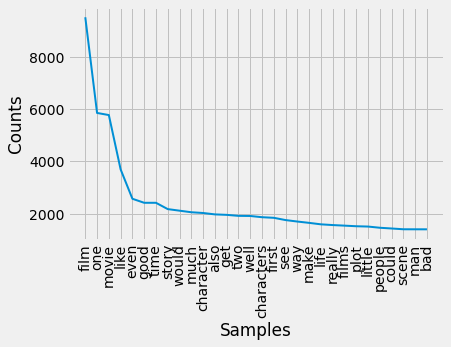

[('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2169), ('would', 2109), ('much', 2049), ('character', 2020), ('also', 1967), ('get', 1949), ('two', 1911), ('well', 1906), ('characters', 1859), ('first', 1836), ('see', 1749), ('way', 1693), ('make', 1642), ('life', 1586), ('really', 1558), ('films', 1536), ('plot', 1513), ('little', 1501), ('people', 1455), ('could', 1427), ('scene', 1397), ('man', 1396), ('bad', 1395)]


In [15]:
freq_dist = nltk.probability.FreqDist(cleaned_words)
freq_dist.plot(30)
plt.show()
print(freq_dist.most_common(30))

In [16]:
nltk.FreqDist(cleaned_words).most_common(18)

[('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('like', 3690),
 ('even', 2565),
 ('good', 2411),
 ('time', 2411),
 ('story', 2169),
 ('would', 2109),
 ('much', 2049),
 ('character', 2020),
 ('also', 1967),
 ('get', 1949),
 ('two', 1911),
 ('well', 1906),
 ('characters', 1859),
 ('first', 1836),
 ('see', 1749)]

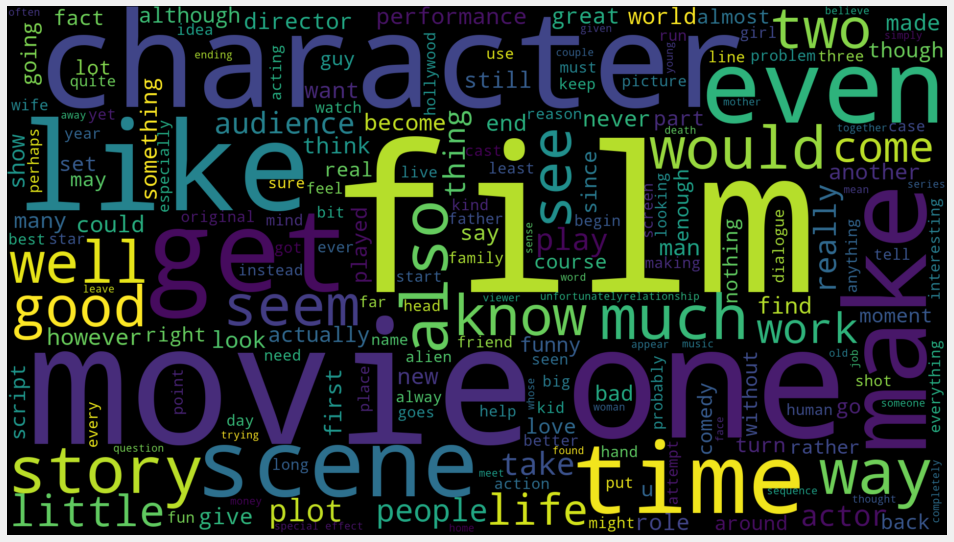

In [17]:
text = " ".join(cleaned_words)
wordcloud = WordCloud(stopwords=stop_words, background_color="black",
                     width=1920, height=1080).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Loading IMDB Dataset

In [18]:
df = pd.read_csv("./Datasets/IMDB.csv")

In [19]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [21]:
df.shape

(50000, 2)

In [22]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [23]:
df.groupby("sentiment").count()

,review
sentiment,
negative,25000
positive,25000


In [24]:
df["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [25]:
# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub("\[[^]]","", text)

# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text,"html.parser")
    return soup.get_text()

# Removing the noisy text
def clean_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text.lower()

# Apply function to review column
df["cleaned_review"] = df["review"].apply(clean_text)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [26]:
df.head(5)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is..."


In [27]:
def remove_special_characters(text):
    return re.sub(r"[^a-zA-Z0-9\s]","",text)

In [28]:
# Apply function on cleaned_review column
df["cleaned_review"] = df["cleaned_review"].apply(remove_special_characters)

In [29]:
df.head(6)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...
5,"Probably my all-time favorite movie, a story o...",positive,probably my alltime favorite movie a story of ...


# Text Stemming

In [30]:
# Stemming the movie_review
def stem_text(text):
    ps = nltk.porter.PorterStemmer()
    text = " ".join([ps.stem(word) for word in text.split()])
    return text

In [31]:
df["stemmed_review"] = df["cleaned_review"].apply(stem_text)

In [32]:
df["stemmed_review"].head(4)

0    one of the other review ha mention that after ...
1    a wonder littl product the film techniqu is ve...
2    i thought thi wa a wonder way to spend time on...
3    basic there a famili where a littl boy jake th...
Name: stemmed_review, dtype: object

In [33]:
# lemm the text
def lemmetize_text(text):
    lm = WordNetLemmatizer()
    text = " ".join([lm.lemmatize(word) for word in text.split()])
    return text

In [34]:
nltk.download("wordnet")

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [35]:
nltk.download("omw-1.4")

[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [36]:
# Apply lemmetize_text to stemmed_review
df["lemma_review"] = df["stemmed_review"].apply(lemmetize_text)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          50000 non-null  object
 1   sentiment       50000 non-null  object
 2   cleaned_review  50000 non-null  object
 3   stemmed_review  50000 non-null  object
 4   lemma_review    50000 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [38]:
df["lemma_review"].head(7)

0    one of the other review ha mention that after ...
1    a wonder littl product the film techniqu is ve...
2    i thought thi wa a wonder way to spend time on...
3    basic there a famili where a littl boy jake th...
4    petter mattei love in the time of money is a v...
5    probabl my alltim favorit movi a stori of self...
6    i sure would like to see a resurrect of a up d...
Name: lemma_review, dtype: object

In [39]:
# Removing the stopwords
def remove_stopwords(text):
    return " ".join([w for w in text.split() if w not in stop_words])

In [40]:
df["review_without_stopwords"] = df["lemma_review"].apply(remove_stopwords)

In [41]:
type(df["review_without_stopwords"].loc[0])

str

In [42]:
text = " ".join([word for word in df["review_without_stopwords"]])

In [43]:
wordcloud1 = WordCloud(stopwords=stop_words, background_color="black",
                      width=1920, height= 1080).generate(text)

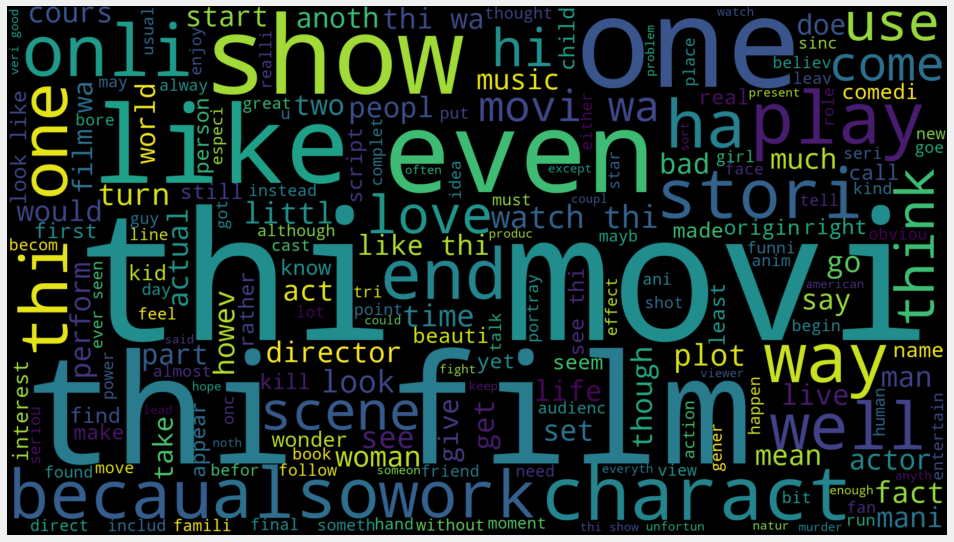

In [44]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

---

# Implementing Machine Learning Models

In [45]:
# Split the dataset
# Train dataset
X_train = df["review"][0:40_000]
y_train = df["sentiment"][0:40_000]

In [46]:
# Test dataset
X_test = df["review"][40_000:]
y_test = df["sentiment"][40_000:]

In [47]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000,) (40000,)
(10000,) (10000,)


In [48]:
#Bags of Words model
# It is used to convert text documents to numerical vectors of bag of words

In [49]:
# Count vectorizer for bag of words
cv = CountVectorizer(min_df=0, max_df=1, binary=False,
                 ngram_range=(1,3))
# transformed train reviews
cv_train_reviews = cv.fit_transform(X_train)
# transformed test reviews
cv_test_reviews = cv.transform(X_test)

print("BOW_cv_train:", cv_train_reviews.shape)
print("BOW_cv_test:", cv_test_reviews.shape)

BOW_cv_train: (40000, 6183315)
BOW_cv_test: (10000, 6183315)


In [50]:
# Term Frequency-Inverse Document Frequency model (TFIDF)
# It is used to convert text documents to matrix of tfidf features.

In [51]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB

In [52]:
# Tfidf vectorizer
tv = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1,3))
# transformed train reviews
tv_train_reviews = tv.fit_transform(X_train)
# transformed test reviews
tv_test_reviews = tv.transform(X_test)
print("Tfidf_train:", tv_train_reviews.shape)
print("Tfidf_test:", tv_test_reviews.shape)

Tfidf_train: (40000, 6183315)
Tfidf_test: (10000, 6183315)


In [53]:
type(tv_train_reviews)

scipy.sparse.csr.csr_matrix

In [54]:
tv_test_reviews[0:45]

<45x6183315 sparse matrix of type '<class 'numpy.float64'>'
	with 1731 stored elements in Compressed Sparse Row format>

In [55]:
# Train the Model
lr = LogisticRegression(penalty="l2",max_iter=500, C=1,
                       random_state=42)
# Fitting the model for Bag of Words
lr_bow = lr.fit(cv_train_reviews, y_train)
print(lr_bow)
# Fitting the model for tfidf features
lr_tfidf = lr.fit(tv_train_reviews, y_train)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [56]:
# Predicting the model for bag of words train dataset
lr_bow_predict_train = lr.predict(cv_train_reviews)
print(lr_bow_predict_train)

# Predicting the model for tfidf features
lr_tfidf_predict_train = lr.predict(tv_train_reviews)
print(lr_tfidf_predict_train)

['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']
['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']


In [57]:
from sklearn.metrics import accuracy_score

In [58]:
# Accuracy score for bag of words train dataset
lr_bow_score_train = accuracy_score(y_train, lr_bow_predict_train)
print("lr_bow_score_train: ", lr_bow_score_train)

# Accuracy score for tfidf features
lr_tfidf_score_train = accuracy_score(y_train, lr_tfidf_predict_train)
print("lr_tfidf_score_train: ", lr_tfidf_score_train)

lr_bow_score_train:  0.99625
lr_tfidf_score_train:  0.99625


In [59]:
# Predicting the model for bag of words test dataset
lr_bow_predict_test = lr.predict(cv_test_reviews)
print(lr_bow_predict_test)

# Predicting the model for tfidf features
lr_tfidf_predict_test = lr.predict(tv_test_reviews)
print(lr_tfidf_predict_test)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [60]:
# Accuracy score for bag of words test dataset
lr_bow_score_test = accuracy_score(y_test, lr_bow_predict_test)
print("lr_bow_score_test: ", lr_bow_score_test)

# Accuracy score for tfidf features
lr_tfidf_score_test = accuracy_score(y_test, lr_tfidf_predict_test)
print("lr_tfidf_score_test: ", lr_tfidf_score_test)

lr_bow_score_test:  0.7676
lr_tfidf_score_test:  0.7659


---

# Classification report for bag of words

In [61]:
from sklearn.metrics import classification_report

In [62]:
lr_bow_report = classification_report(y_test, lr_bow_predict_test, target_names=["Positive","Negative"])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.77      0.77      0.77      4993
    Negative       0.77      0.77      0.77      5007

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



# Classification report for tfidf features

In [63]:
lr_tfidf_report = classification_report(y_test, lr_tfidf_predict_test, target_names=["Positive","Negative"])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.76      0.78      0.77      4993
    Negative       0.78      0.75      0.76      5007

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



## Multinomial Naive Bayes for Bag of Words and TFIDF